In [3]:
import pandas as pd
df_american_2010 = pd.read_csv("../data/american_movies_with_budget_2010.csv", index_col=0)
df_american_2010.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,Budget,Box Office,Clean_Budget,Clean_Box_Office
15776,2010,127 Hours,American,Danny Boyle,"James Franco, Amber Tamblyn, Kate Mara, Clémen...","biography, drama",https://en.wikipedia.org/wiki/127_Hours,Mountaineer Aron Ralston goes hiking at Utah's...,$18 million[3],$60.7 million[3],18.0,60.7
15777,2010,The A-Team,American,Joe Carnahan,"Liam Neeson, Bradley Cooper, Quinton ""Rampage""...","action, adventure",https://en.wikipedia.org/wiki/The_A-Team_(film),"John ""Hannibal"" Smith is held captive in Mexic...",$100–110 million[2][3],$177.2 million[3],105.0,177.2
15780,2010,Alice in Wonderland,American,Tim Burton,"Johnny Depp, Anne Hathaway, Helena Bonham Cart...","family, fantasy",https://en.wikipedia.org/wiki/Alice_in_Wonderl...,Troubled by a strange recurring dream and mour...,$150[2][3]–$200[4] million,$1.025 billion[5],175.0,1025.0
15781,2010,All Good Things,American,Andrew Jarecki,"Ryan Gosling, Kirsten Dunst, Frank Langella, K...",mystery,https://en.wikipedia.org/wiki/All_Good_Things_...,"In 1970s New York City, David Marks (Gosling),...",$60 million,$1.8 million[2],60.0,1.8
15782,2010,Alpha and Omega,American,"Anthony Bell, Ben Gluck","Justin Long, Hayden Panettiere, Dennis Hopper,...","animated, comedy, drama, family",https://en.wikipedia.org/wiki/Alpha_and_Omega_...,"In Alberta, Canada's Jasper National Park, Kat...",$20 million[3],$50.5 million[4],20.0,50.5


In [6]:
# Find the most expensive movie by budget
max_budget = df_american_2010['Clean_Budget'].max()
most_expensive_movie = df_american_2010[df_american_2010['Clean_Budget'] == max_budget]
most_expensive_movie[['Title', 'Clean_Budget']]


,Title,Clean_Budget
16983,Avengers: Age of Ultron,469.6


In [7]:
# Find the movie with the highest box office revenue
max_clean_box_office = df_american_2010['Clean_Box_Office'].max()
highest_clean_box_office_movie = df_american_2010[df_american_2010['Clean_Box_Office'] == max_clean_box_office]
highest_clean_box_office_movie[['Title', 'Clean_Box_Office']]


,Title,Clean_Box_Office
16392,Titanic 3D,2264.0


In [8]:
# Calculate the average clean budget for all movies
average_clean_budget = df_american_2010['Clean_Budget'].mean()
average_clean_budget


50.924413890564374

In [15]:
# Find the director with the highest avg in box office
highest_avg = df_american_2010.groupby('Director')['Clean_Box_Office'].mean()
highest_avg

Director
A Monster Calls     47.300000
Aaron Schneider     10.800000
Aaron Sorkin        59.300000
Aaron Woodley        1.040000
Abe Sylvia           0.143485
                      ...    
Woody Allen         70.740000
Zach Braff          84.900000
Zack Snyder        487.120000
Zal Batmanglij       0.408015
Zhang Yimou        334.900000
Name: Clean_Box_Office, Length: 778, dtype: float64

In [27]:
highest_avg.sort_values(ascending=False).head(1)

Director
James Cameron    2264.0
Name: Clean_Box_Office, dtype: float64

In [28]:
# Calculate the total clean box office revenue for all movies
total_clean_box_office = df_american_2010['Clean_Box_Office'].sum()
total_clean_box_office

183598.91116516

In [32]:
# Filter for comedy movies and find the biggest budget
comedy_movies = df_american_2010[df_american_2010['Genre'] == 'comedy']
comedy_movies.sort_values(by="Clean_Budget",ascending=False).head(1)


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,Budget,Box Office,Clean_Budget,Clean_Box_Office
17001,2015,Inside Out,American,Pete Docter,Amy Poehler\r\nLewis Black\r\nMindy Kaling\r\n...,comedy,https://en.wikipedia.org/wiki/Inside_Out_(2015...,Riley Andersen is born in Minnesota. Within he...,$175 million,$858.8 million,175.0,858.8


In [35]:
# Filter for action movies and find the highest clean box office revenue
action_movies = df_american_2010[df_american_2010['Genre'] == 'action']
highest_clean_action_box_office = action_movies['Clean_Box_Office'].max()
highest_clean_action_box_office_movie = action_movies[action_movies['Clean_Box_Office'] == highest_clean_action_box_office]
highest_clean_action_box_office_movie[['Title', 'Clean_Box_Office']]

,Title,Clean_Box_Office
16966,Furious 7,1515.0


In [36]:
# Group by 'Director' and sum the clean box office revenue for each director
directors_clean_box_office = df_american_2010.groupby('Director')['Clean_Box_Office'].sum()
highest_grossing_clean_director = directors_clean_box_office.idxmax()
highest_grossing_clean_director


'Michael Bay'

In [41]:
# Group by 'Genre' and calculate the average clean budget for each genre
genre_average_clean_budget = df_american_2010.groupby('Genre')['Clean_Budget'].mean().sort_values(ascending=False)
genre_average_clean_budget

Genre
superhero, action, adventure, fantasy, sci-fi    300.00000
crime drama, superhero                           275.00000
action, adventure, fantasy, comedy               275.00000
action-adventure, family                         245.30000
action, adventure, fantasy, sci-fi               242.50000
                                                   ...    
sci-fi, drama                                      0.25000
fantasy, sci-fi drama                              0.10000
drama, fantasy, horror, romance                    0.10000
action, adventure, drama, superhero                0.00010
neo-noir, action, thriller                         0.00004
Name: Clean_Budget, Length: 346, dtype: float64

In [42]:
genre_with_highest_average_clean_budget = genre_average_clean_budget.idxmax()
genre_with_highest_average_clean_budget

'superhero, action, adventure, fantasy, sci-fi'

In [43]:
# Create a new column for the clean box office-to-budget ratio
df_american_2010['Ratio'] = df_american_2010['Clean_Box_Office'] / df_american_2010['Clean_Budget']



Title    House at the End of the Street
Ratio                    6391304.347826
Name: 16300, dtype: object

In [56]:
movie_with_highest_clean_ratio = df_american_2010.sort_values(by='Ratio', ascending=False)
movie_with_highest_clean_ratio

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,Budget,Box Office,Clean_Budget,Clean_Box_Office,Ratio,Benefit
16300,2012,House at the End of the Street,American,Mark Tonderai,"Jennifer Lawrence, Max Thieriot, Gil Bellows a...",horror thriller,https://en.wikipedia.org/wiki/House_at_the_End...,A newly divorced medical doctor Sarah Cassidy ...,$6.9-10 million[1][2],$44.1 million[1],0.000007,44.100000,6.391304e+06,44.099993
17231,2017,How to Be a Latin Lover,American,Ken Marino,"Ken Marino (director); Chris Spain, Jon Zack (...",comedy,https://en.wikipedia.org/wiki/How_to_Be_a_Lati...,Having made a career of seducing rich older wo...,$10-13 million[2][3],$62.6 million[2],0.000010,62.600000,6.260000e+06,62.599990
16776,2014,Rio 2,American,Carlos Saldanha,Jesse Eisenberg\r\nAnne Hathaway\r\nJamie Foxx...,animated,https://en.wikipedia.org/wiki/Rio_2,Spix's Macaws Blu and Jewel and their three ch...,$103‒130 million[2][3][4],$498.8 million[3],0.000103,498.800000,4.842718e+06,498.799897
17184,2017,John Wick: Chapter 2,American,Chad Stahelski,Chad Stahelski (director); Derek Kolstad (scre...,"neo-noir, action, thriller",https://en.wikipedia.org/wiki/John_Wick:_Chapt...,Four days after the events of the first film[6...,$40+ million[2],$174.3 million[3],0.000040,174.300000,4.357500e+06,174.299960
17032,2016,Norm of the North,American,Trevor Wall,Rob Schneider\r\nHeather Graham\r\nKen Jeong,animation comedy,https://en.wikipedia.org/wiki/Norm_of_the_North,Norm the polar bear is the son of the king of ...,$7-18 million[4],$30.5 million[5],0.000007,30.500000,4.357143e+06,30.499993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15906,2010,Passion Play,American,Mitch Glazer,"Mickey Rourke, Megan Fox, Bill Murray, Kelly L...",drama,https://en.wikipedia.org/wiki/Passion_Play_(film),"Nate (Mickey Rourke), a small-time jazz musici...",$15 million,"$3,669",15.000000,0.003669,2.446000e-04,-14.996331
17168,2017,100 Streets,American,Jim O'Hanlon,Jim O'Hanlon (director); Leon F. Butler (scree...,drama,https://en.wikipedia.org/wiki/100_Streets,The film centers on three characters who have ...,£3 million[1],less than $372[2],3.000000,0.000372,1.240000e-04,-2.999628
16286,2012,Ghost Rider: Spirit of Vengeance,American,Neveldine/Taylor,"Nicolas Cage, Ciarán Hinds, Violante Placido, ...",superhero,https://en.wikipedia.org/wiki/Ghost_Rider:_Spi...,"In Romania, a French priest named Moreau warns...",$57 million[4][6],$132.6 – 149.4 million[4][7],57.000000,0.000133,2.326316e-06,-56.999867
16163,2012,Air Collision,American,Liz Adams,"Reginald VelJohnson, Jordan Ladd, Gerald Webb",action,https://en.wikipedia.org/wiki/Air_Collision,After a major electromagnetic storm cripples c...,£4 million,£2.56,4.000000,0.000003,6.400000e-07,-3.999997


In [53]:
df_american_2010.loc[movie_with_highest_clean_ratio, ['Title', 'Ratio', 'Clean_Budget', 'Clean_Box_Office']]


Title               House at the End of the Street
Ratio                               6391304.347826
Clean_Budget                              0.000007
Clean_Box_Office                              44.1
Name: 16300, dtype: object

In [50]:
# Checking if it's right
df_american_2010.query('Title == "House at the End of the Street"')[['Budget','Box Office', 'Clean_Budget', 'Clean_Box_Office']]
# Error in parsing

,Budget,Box Office,Clean_Budget,Clean_Box_Office
16300,$6.9-10 million[1][2],$44.1 million[1],0.000007,44.1


In [51]:
# Compute the benefit for each movie
df_american_2010['Benefit'] = df_american_2010['Clean_Box_Office'] - df_american_2010['Clean_Budget']

# Group by 'Release Year' and calculate the average benefit per year
average_benefit_by_year = df_american_2010.groupby('Release Year')['Benefit'].mean()
average_benefit_by_year

Release Year
2010     88.921550
2011     95.628447
2012    121.638509
2013     95.252580
2014    119.005957
2015    139.630984
2016    117.135318
2017    126.301558
Name: Benefit, dtype: float64

<Axes: xlabel='Release Year'>

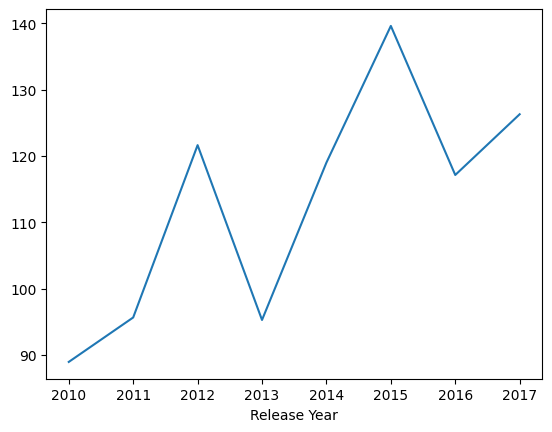

In [52]:
average_benefit_by_year.plot()

,Title,Budget,Box Office
0,Movie A,100,300
1,Movie B,150,500
2,Movie C,200,700
